## Defining the Question

### a) Specifying the Question

The research question is to determine whether or not the patient's symptoms indicate that the patient has hypothyroid.


### b) Defining the Metric for Success

For this analysis to be considered successful, the following areas must be covered:
1. If we create models that determines whether or not the patients symptoms indicate if the patient has hypothyroid.
2. If we predict if the patient are hypothyroidic or not.
3. If we get the most accurate model that has high prediction rate.

### c) Understanding the context 

> Hypothyroid disease or Hypothyroidism is one of the most difficult diseases to diagnose. It is a condition which causes your thyroid gland to not produce enough of certain crucial hormones. 

>It usually may not cause noticeable symptoms in the early stages and hence becomes extremely difficult to diagnose. Applying deep learning algorithms can help assist healthcare workers in identifying signs and symptoms based on patterns shown in past cases of patients' data.

>In this analysis, we will be learning the code and workflow for diagnosing whether or not a person is suffering from Hypothyroid disease based on various metrics.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1.Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording our observations.
6. Performing prediction using any of the two models Random forests, Ada boosted trees, and gradient boosted trees.
7. Perform optimization on our dataset by tuning our hyperparameters
8. Perfom Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

### e) Data Relevance

The dataset to use for this project is found by following this link: [http://bit.ly/hypothyroid_data] (Links to an external site.)].  

Below is the dataset Dataset Columns

Age
Sex
on_thyroxine
uery_on_thyroxine
on_antithyroid_medicationthyroid_surgery
query_hypothyroid
query_hyperthyroid
pregnant
sick
tumor
lithium
goitre
TSH_measured
TSH
T3_measured
T3
TT4_measured
TT4

## Reading the Data

### Importing our Libraries

In [162]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

### Loading our Dataset

In [163]:
# Loading the Dataset from the source i.e. csv

hypothyroid_df = pd.read_csv('hypothyroid.csv')

### Previewing the Dataset 

In [164]:
# previewing the first five entries of the dataset

hypothyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [165]:
# previewing the last five entries of the dataset

hypothyroid_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## Checking the Data

In [166]:
# From our profile report, we can see that we don't have any duplicated rows
# But let us check 
hypothyroid_df.duplicated().sum()

77

> We have 77 duplicated columns after checking for duplicates

In [167]:
# occurrence based on all columns 
duplicate = hypothyroid_df[hypothyroid_df.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.head()

Duplicate Rows :


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?


> Viewing the duplicate columns we realize there are several different features that distinguishes the columns rather than the given columns of the duplicates, there is a difference in age, TSH, T3, TT4, T4U and FTI

In [168]:
#selecting the relevant columns to work with.
hypothyroid_df = hypothyroid_df.drop({'TBG'}, 1)
hypothyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


> We drop TBG column since it has so many null values

In [169]:
# Checking for the shape of the dataframe
hypothyroid_df.shape

(3163, 25)

> Our dataframe has 3163 entries and 25 features/columns

## Data Cleaning

In [170]:
# removing rows with question mark

hypothyroid_df.replace({'age': {'?': np.nan}}, regex=False,inplace=True)
hypothyroid_df.replace({'THS': {'?': np.nan}}, regex=False,inplace=True)
hypothyroid_df.replace({'T3': {'?': np.nan}}, regex=False,inplace=True)
hypothyroid_df.replace({'TT4': {'?': np.nan}}, regex=False,inplace=True)
hypothyroid_df.replace({'T4U': {'?': np.nan}}, regex=False,inplace=True)
hypothyroid_df.replace({'FTI': {'?': np.nan}}, regex=False,inplace=True)

> We remove the question mark and replace it by Null to enable us fill missing values.

In [171]:
# Checking for unique values in our target variable

hypothyroid_df['status'].nunique

<bound method IndexOpsMixin.nunique of 0       hypothyroid
1       hypothyroid
2       hypothyroid
3       hypothyroid
4       hypothyroid
           ...     
3158       negative
3159       negative
3160       negative
3161       negative
3162       negative
Name: status, Length: 3163, dtype: object>

In [172]:
# changing our data types from object and replacing with binary number

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

hypothyroid_df['status'] = hypothyroid_df['status'].replace({'hypothyroid':0, 'negative':1})
hypothyroid_df['sex'] = hypothyroid_df['sex'].replace({'M':0, 'F':1})
hypothyroid_df = hypothyroid_df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0})
hypothyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0
1,0,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0
2,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0
3,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0
4,0,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0


In [173]:
# Columns with dtype as 'object'
cols = hypothyroid_df.columns[hypothyroid_df.dtypes.eq('object')]
# Convert to numeric values
hypothyroid_df[cols] = hypothyroid_df[cols].apply(pd.to_numeric, errors='coerce')
hypothyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

> There are missing values in the dataframe, we have two type of datatype integers and floats 

In [174]:
# data description

hypothyroid_df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,2717.000000,3090.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,2695.000000,3163.000000,2468.000000,3163.000000,2914.000000,3163.000000,2915.000000,3163.000000,2916.000000,3163.000000
mean,0.952261,51.154214,0.706149,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.923180,0.780272,1.939749,0.921277,108.850000,0.921593,0.978199,0.921910,115.397771,0.082200
std,0.213248,19.294405,0.455598,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,23.899467,0.414128,0.996773,0.269348,45.485419,0.268853,0.226580,0.268356,60.239572,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.400000,1.000000,83.000000,1.000000,0.850000,1.000000,91.000000,0.000000
50%,1.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.700000,1.000000,1.800000,1.000000,104.000000,1.000000,0.960000,1.000000,107.000000,0.000000
75%,1.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.300000,1.000000,2.300000,1.000000,128.000000,1.000000,1.065000,1.000000,129.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


> The mean age of the persons who turned out for checking is 51, the mean of TT4 108.85, FTI mean 115.4

In [175]:
# Checking for null values

hypothyroid_df.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

> We have missing values in age, sex, T3, TT4, T4U and FTI

In [176]:
# Filling our null values
hypothyroid_df.age = hypothyroid_df['age'].fillna(hypothyroid_df.age.mean())
hypothyroid_df.sex = hypothyroid_df['sex'].fillna(0)
hypothyroid_df.T3 = hypothyroid_df['T3'].fillna(hypothyroid_df.T3.mean())
hypothyroid_df.TSH = hypothyroid_df['TSH'].fillna(hypothyroid_df.TSH.mean())
hypothyroid_df.TT4 = hypothyroid_df['TT4'].fillna(hypothyroid_df.TT4.mean())
hypothyroid_df.T4U = hypothyroid_df['T4U'].fillna(hypothyroid_df.T4U.mean())
hypothyroid_df.FTI = hypothyroid_df['FTI'].fillna(hypothyroid_df.FTI.mean())
hypothyroid_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

> After filling the missing values, there are no null values in the dataframe.

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [177]:
# finding the information about the variables
hypothyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [178]:
# checking for anormalities
Q1 = hypothyroid_df.quantile(0.25)
Q3 = hypothyroid_df.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_Boundstatus                        1.00000
age                          -1.00000
sex                          -1.50000
on_thyroxine                  0.00000
query_on_thyroxine            0.00000
on_antithyroid_medication     0.00000
thyroid_surgery               0.00000
query_hypothyroid             0.00000
query_hyperthyroid            0.00000
pregnant                      0.00000
sick                          0.00000
tumor                         0.00000
lithium                       0.00000
goitre                        0.00000
TSH_measured                  1.00000
TSH                          -8.88477
T3_measured                   1.00000
T3                            0.45000
TT4_measured                  1.00000
TT4                          26.50000
T4U_measured                  1.00000
T4U                           0.57500
FTI_measured                  1.00000
FTI                          41.00000
TBG_measured                  0.00000
dtype: float64
Upper_Boundstatus       

> Checking for anomalies in the dataframe, there are negative sex and age which is an anormalies in the data. There is also an age of 103 which is an outlier its quite rear to get such age.

In [179]:
# Checking for columns

hypothyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

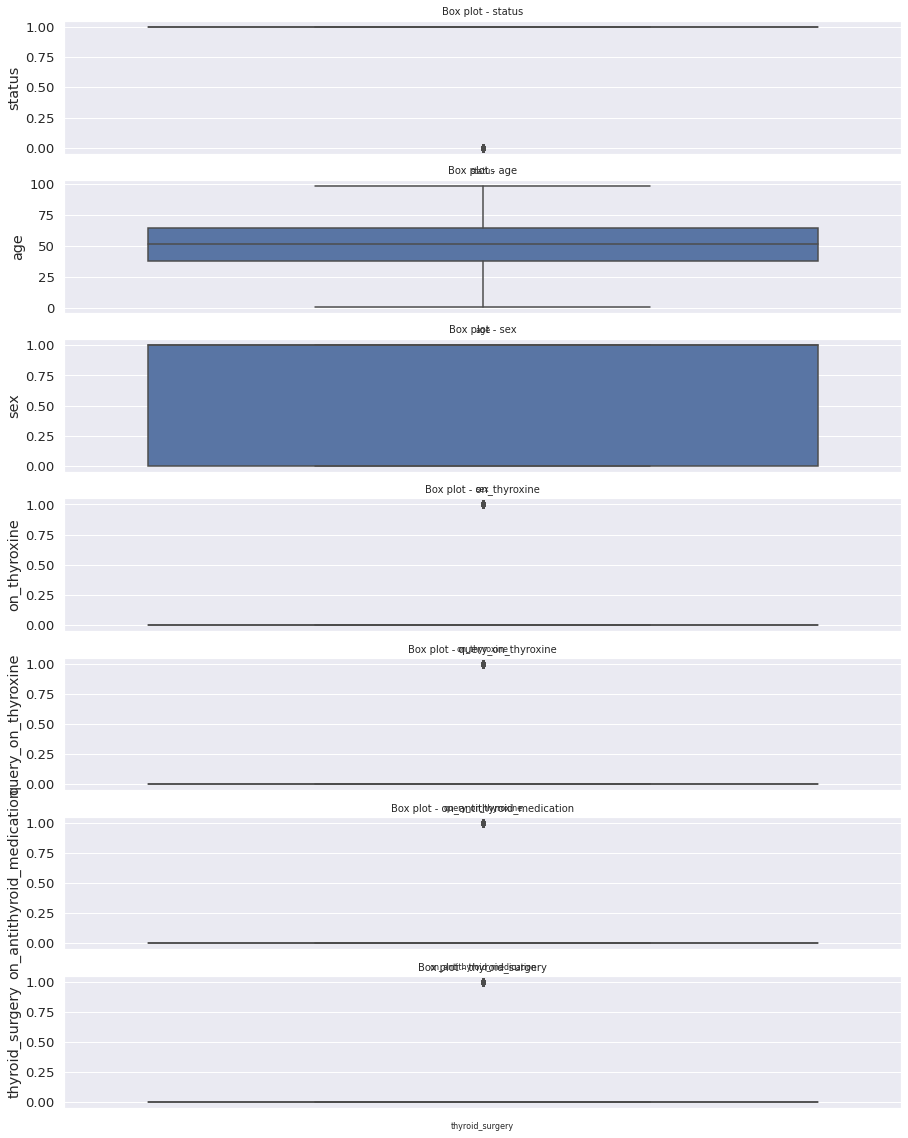

In [180]:
# checking for outliers
col_names = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery']

fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = hypothyroid_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

> There is an oulier in in thyroid surgery,  

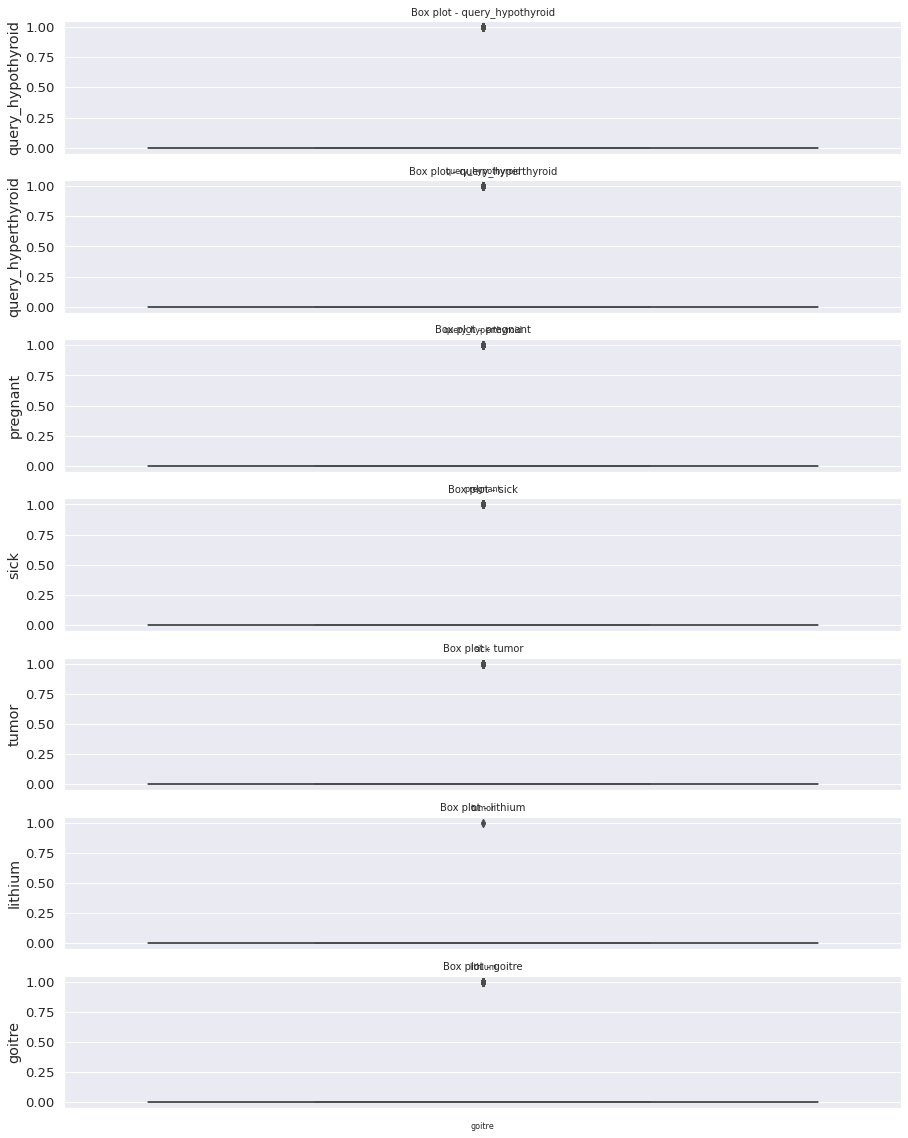

In [181]:
# checking for outliers
col_names = ['query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = hypothyroid_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

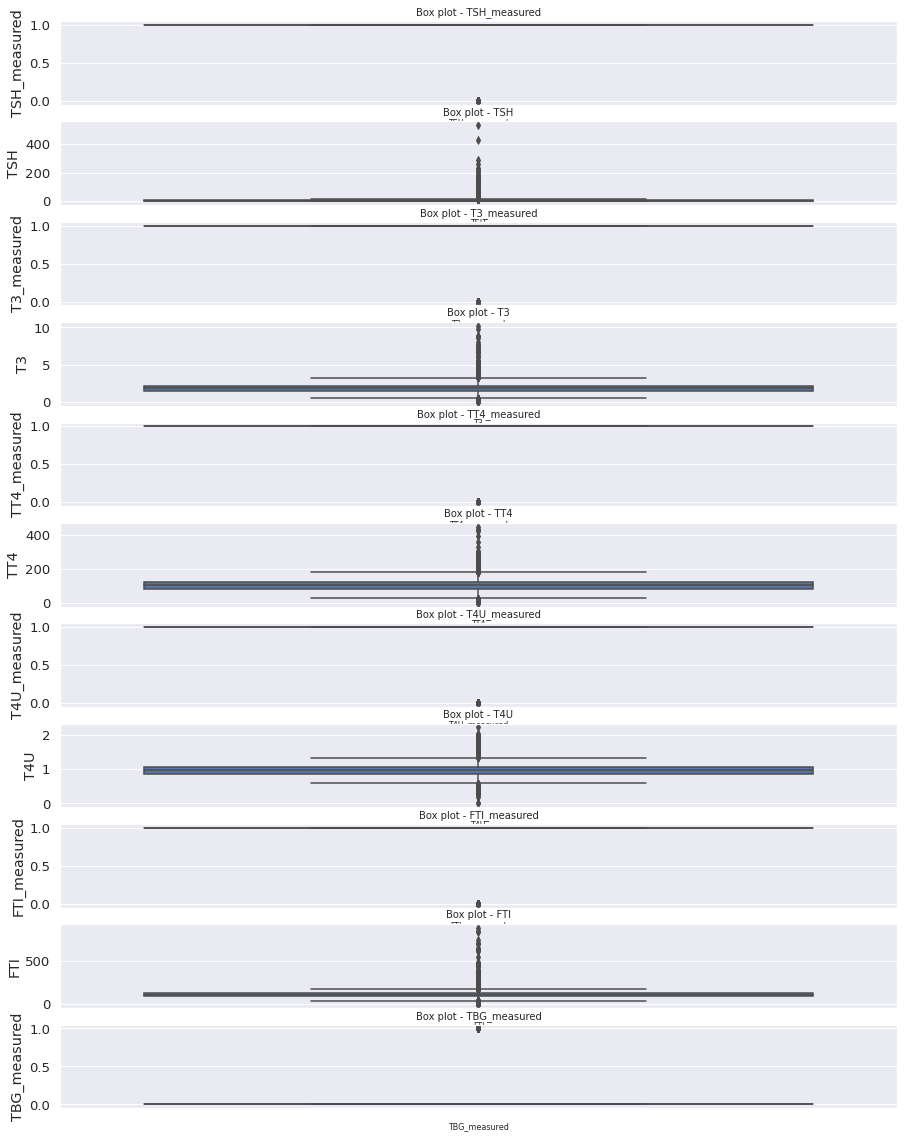

In [182]:
# checking for outliers
col_names = ['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = hypothyroid_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

> There are ouliers in, FTI, T4U, TT4, TSH, T3




> 

In [183]:
# Removing the outliers

hypothyroid_df1 =hypothyroid_df[~((hypothyroid_df < (Q1 - 1.5 * IQR)) |(hypothyroid_df > (Q3 + 1.5 * IQR))).any(axis=1)]
hypothyroid_df1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
151,1,20.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1.8,1,68.0,1,0.99,1,68.0,0
153,1,29.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,2.5,1,83.0,1,0.93,1,89.0,0
154,1,45.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.9,1,1.0,1,82.0,1,0.73,1,112.0,0
156,1,56.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.8,1,76.0,1,0.77,1,99.0,0
158,1,62.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.4,1,2.2,1,103.0,1,0.99,1,104.0,0


> When we remove the outliers, our index starts from 151

In [184]:
# Getting the size of our data set after removing the outliers
hypothyroid_df1.shape

# Afer removing the outliers we remain with 863 rows.

(1265, 25)

> since removing the outliers we shall get rid of over 1000 entries, we choose to work with the outliers.
> Removing the outliers we shall lose almost a quater of the dataset.

Text(0.5, 1.0, 'Comparison of Hypothyroid and Negative')

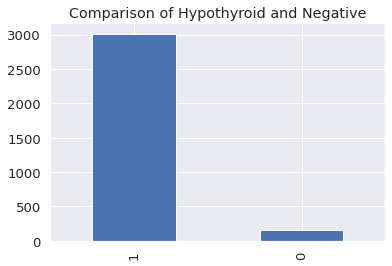

In [185]:
# Bar graph showing the number of bedrooms per unit.

hypothyroid_df.status.value_counts().plot.bar()
plt.title('Comparison of Hypothyroid and Negative')
# most of the tested persons are negative.

> Most of the people who turned out are negative while a few people are hypothyroid 

Text(0.5, 1.0, 'Gender turning for testing')

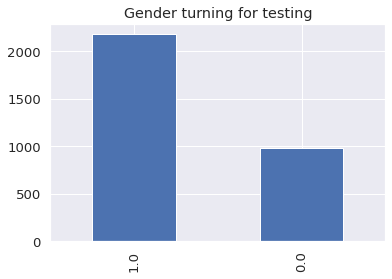

In [186]:
# Bar graph showing the level of the house.

hypothyroid_df.sex.value_counts().plot.bar()
plt.title('Gender turning for testing')
# majority of people who turned out for testing are female

> Most of the people who turned out for the check up were women as compared to men.

Text(0.5, 1.0, 'People on Thyroxine')

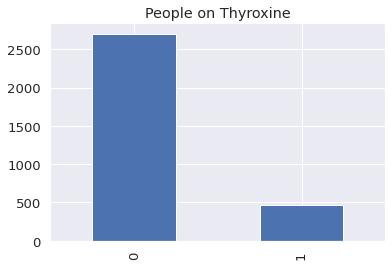

In [187]:
# Bar graph showing the floor of the house.

hypothyroid_df.on_thyroxine.value_counts().plot.bar()
plt.title('People on Thyroxine')

> Most of the sick persons are on thyroxine medication.

### c) Summary Statistics

In [98]:
hypothyroid_df.describe(include= 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.154214,0.689851,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.923180,0.780272,1.939749,0.921277,108.850000,0.921593,0.978199,0.921910,115.397771,0.082200
std,0.213248,17.881969,0.462627,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.060029,0.414128,0.880441,0.269348,43.657766,0.268853,0.217513,0.268356,57.838927,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,51.154214,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.939749,1.000000,107.000000,1.000000,0.978199,1.000000,110.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.923180,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


## Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97d615bb50>,
      dtype=object)

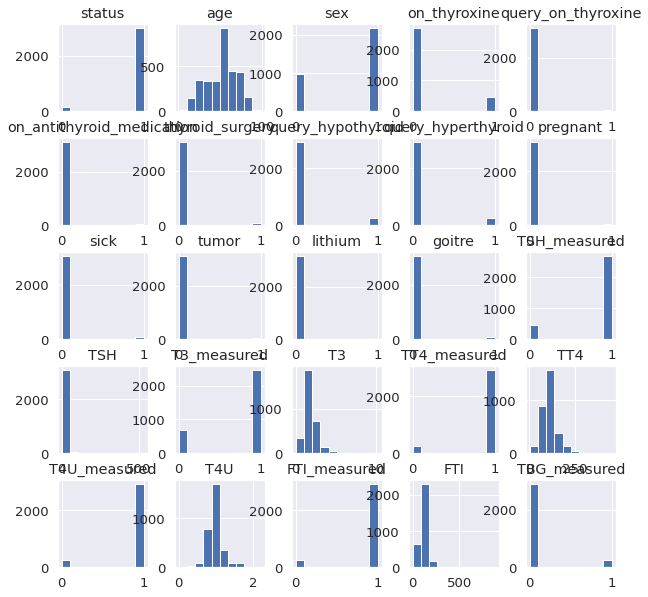

In [99]:
# plotting data hystograms

hypothyroid_df.hist(figsize = (10,10))

> There is a good distribution of data on T4U, TT4, FTI and Age

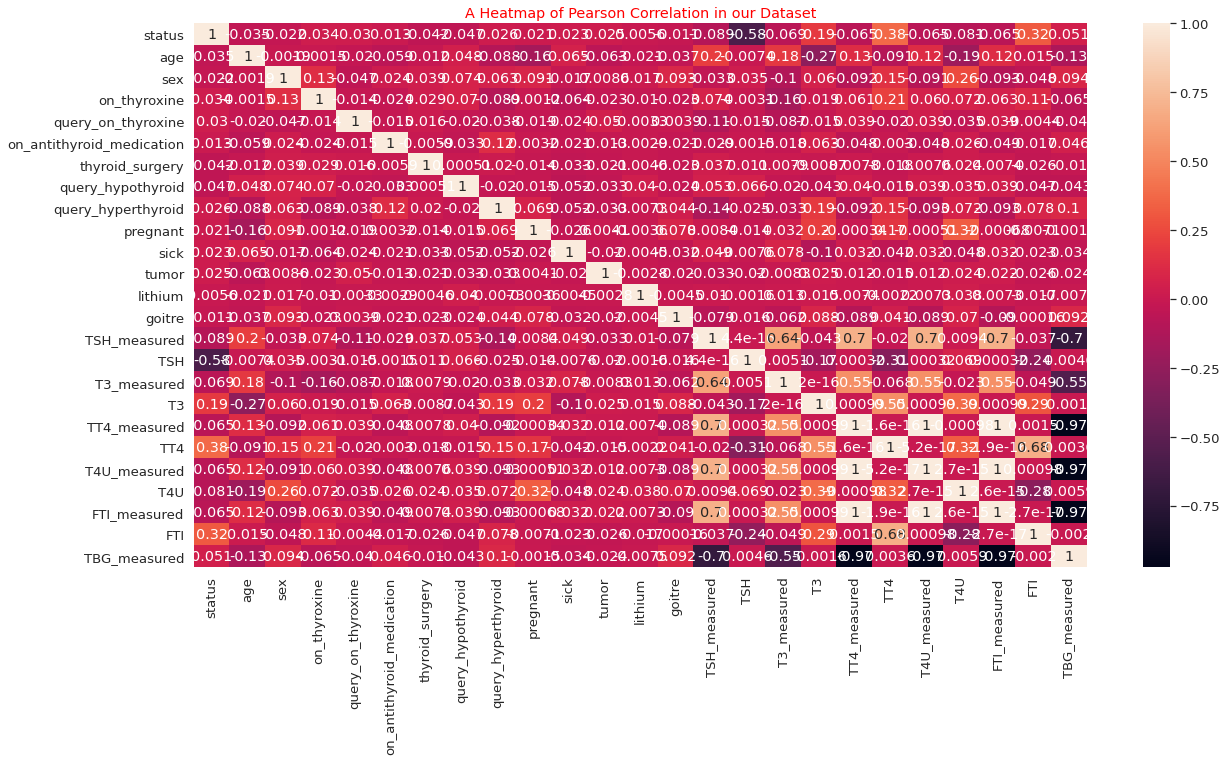

In [100]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(hypothyroid_df.corr(), annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

> From the piarson correlation, there is generally weak correlation between the variables.

In [101]:
# finding the skewness of our variables
hypothyroid_df.skew()

# Most of our varaibles are positively skewed with only year of built negatively skewed.

status                       -4.244318
age                          -0.175276
sex                          -0.821272
on_thyroxine                  2.008884
query_on_thyroxine            7.387730
on_antithyroid_medication     8.508327
thyroid_surgery               5.241518
query_hypothyroid             3.196349
query_hyperthyroid            3.179507
pregnant                      6.875427
sick                          5.386030
tumor                         8.726972
lithium                      39.749202
goitre                        5.386030
TSH_measured                 -1.983919
TSH                          11.075279
T3_measured                  -1.354409
T3                            2.401958
TT4_measured                 -3.130104
TT4                           1.571505
T4U_measured                 -3.138224
T4U                           0.954853
FTI_measured                 -3.146389
FTI                           5.317936
TBG_measured                  3.043638
dtype: float64

> Most of our features are positive, but we have several that are negative. Therefore we have a right skewed model.

In [102]:
# finding the kurtosis
hypothyroid_df.kurt()

# most of our variables have positive kurtosis

status                         16.024369
age                            -0.625620
sex                            -1.326351
on_thyroxine                    2.036901
query_on_thyroxine             52.611814
on_antithyroid_medication      70.436172
thyroid_surgery                25.489632
query_hypothyroid               8.221847
query_hyperthyroid              8.114398
pregnant                       45.300146
sick                           27.026406
tumor                          74.206957
lithium                      1578.997469
goitre                         27.026406
TSH_measured                    1.937159
TSH                           180.097308
T3_measured                    -0.165682
T3                             14.017703
TT4_measured                    7.802486
TT4                             7.810266
T4U_measured                    7.853415
T4U                             3.963176
FTI_measured                    7.904760
FTI                            51.464046
TBG_measured    

> All our models are positive in nature

## Multivariate Analysis

### Principal Component Analysis

In [103]:
# working for principal component analysis
# defining our function.

hypothyroid_df_pca = hypothyroid_df.copy(deep=True)

In [104]:
# defining our x and y by sellecting columns
x = hypothyroid_df_pca.drop(['status'], axis= 1) # features
y = hypothyroid_df_pca['status'] #target variable

# Splitting the data into train and test sets

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [105]:
# Performing standard scalar normalization to normalize our feature set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [106]:
# Applying PCA
# We did not specify the number of components in the constructor. 
# Hence, the features in Financial_encoding set will be returned for both the training and test sets.

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [107]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.17451052e-01, 1.08572877e-01, 7.43294611e-02, 5.73411742e-02,
       5.19281105e-02, 4.79214792e-02, 4.40891963e-02, 4.31554249e-02,
       4.21427362e-02, 4.10277157e-02, 4.03330839e-02, 3.72517489e-02,
       3.66633514e-02, 3.39695458e-02, 3.31673317e-02, 3.02360894e-02,
       2.45314836e-02, 1.70300827e-02, 1.26168889e-02, 4.02351267e-03,
       1.92522237e-03, 2.16691886e-04, 7.57394311e-05, 5.37262564e-34])

> Principle component analysis reduces the dimension of our data.

## Implementing the solution

##### Checking for multicolinearity

In [108]:
# finding the correlations between the variables

corr = hypothyroid_df[['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']].corr()
corr

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
status,1.000000,-0.035415,-0.021903,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,0.005632,-0.010847,-8.912872e-02,-5.820097e-01,-6.868200e-02,1.865430e-01,-6.545094e-02,3.765792e-01,-6.530818e-02,-8.114960e-02,-6.516520e-02,3.162585e-01,0.050812
age,-0.035415,1.000000,-0.001927,-0.001492,-0.019763,-0.058943,-0.012284,0.048322,-0.087881,-0.159354,0.064631,-0.063094,-0.021320,-0.037187,2.014359e-01,-7.429077e-03,1.768487e-01,-2.686477e-01,1.263930e-01,-9.117529e-02,1.241160e-01,-1.946565e-01,1.246650e-01,1.546035e-02,-0.128832
sex,-0.021903,-0.001927,1.000000,0.129742,-0.046756,0.024042,0.039308,0.074057,0.062536,0.090695,-0.016860,0.008600,0.016866,0.093049,-3.301319e-02,3.499974e-02,-1.032577e-01,6.002796e-02,-9.194439e-02,1.501038e-01,-9.132516e-02,2.578292e-01,-9.325147e-02,-4.781083e-02,0.093661
on_thyroxine,0.033652,-0.001492,0.129742,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,7.371133e-02,-3.147937e-03,-1.616563e-01,1.880095e-02,6.085599e-02,2.141679e-01,6.048229e-02,7.192532e-02,6.344687e-02,1.135207e-01,-0.064897
query_on_thyroxine,0.029785,-0.019763,-0.046756,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-1.080531e-01,-1.495940e-02,-8.712329e-02,-1.514719e-02,3.888622e-02,-2.009985e-02,3.880140e-02,-3.459826e-02,3.871645e-02,-4.386403e-03,-0.039811
on_antithyroid_medication,0.013020,-0.058943,0.024042,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-2.944865e-02,-1.494155e-03,-1.848694e-02,6.308933e-02,-4.813860e-02,-2.967621e-03,-4.836372e-02,2.579721e-02,-4.858990e-02,-1.741018e-02,0.045730
thyroid_surgery,-0.041868,-0.012284,0.039308,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,3.689035e-02,1.118306e-02,7.928734e-03,-8.658540e-03,7.815542e-03,-1.764577e-02,7.613078e-03,2.400594e-02,7.409903e-03,-2.632235e-02,-0.009997
query_hypothyroid,-0.047477,0.048322,0.074057,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,5.255328e-02,6.628605e-02,-2.027678e-02,-4.290464e-02,3.970123e-02,-1.491521e-02,3.943660e-02,3.526582e-02,3.917118e-02,-4.675330e-02,-0.042562
query_hyperthyroid,0.025616,-0.087881,0.062536,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-1.372360e-01,-2.492156e-02,-3.327552e-02,1.888334e-01,-9.200056e-02,1.506073e-01,-9.250933e-02,7.197632e-02,-9.302042e-02,7.763311e-02,0.103840
pregnant,0.021306,-0.159354,0.090695,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,8.422148e-03,-1.393243e-02,3.193077e-02,2.013056e-01,-3.400278e-04,1.654025e-01,-5.083199e-04,3.242593e-01,-6.772365e-04,-7.124221e-03,-0.001472


> Based on these there are no columns with higher multicolinearity, there is a weak multicolinearity within the variables.

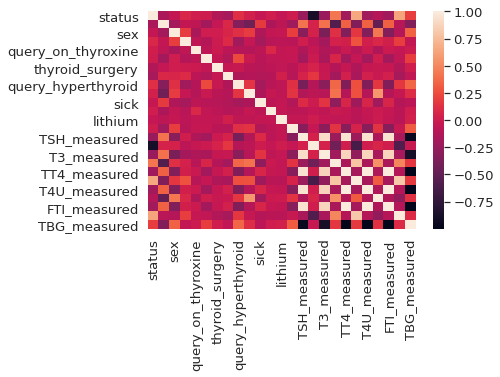

In [109]:
# Checking for independence between features¶
# 
sns.heatmap(corr.corr())  

## Part 1: Decision Tree

## Random Forest

In [110]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is hypothyroidic or negative, so let's use that column as our y
y = hypothyroid_df['status'].values


test_features = hypothyroid_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypothyroid_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.954657
std,0.198619,0.193167
min,0.000000,0.000711
25%,1.000000,0.999961
50%,1.000000,0.999961
75%,1.000000,0.999961
max,1.000000,0.999961


> There is a relative simillarity between the actual and predicted values, there is a little difference between the dataframe.

In [111]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.018190260398989216
Mean Squared Error: 0.012157471937423815
Root Mean Squared Error: 0.11026092661239437


> There is very little root mean squire.

#### Visualizing our tree

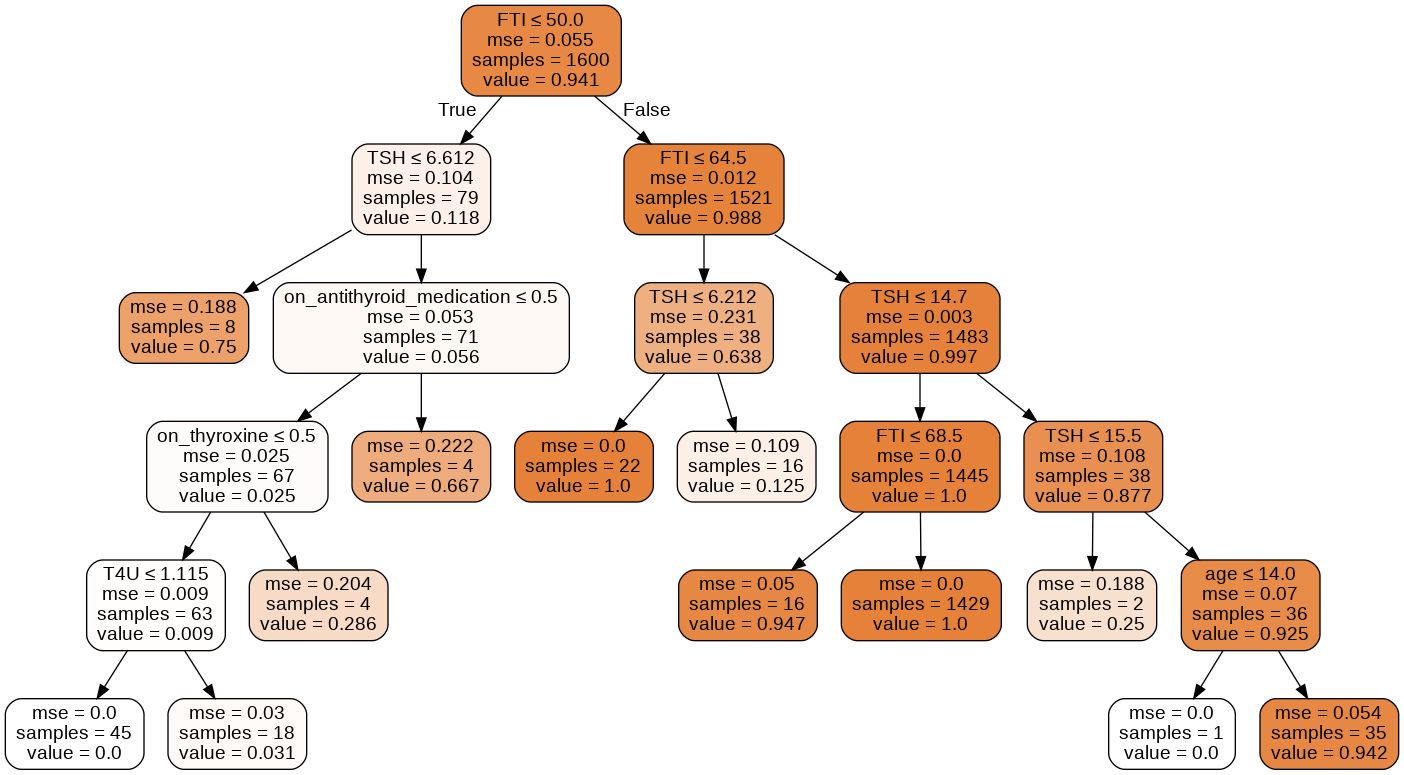

In [112]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

> Our tree is of three steps or branches, From the node to the leaf the model tends tends to reduce the mse a much as possible.

#### Determining which factors contribute more to the status

In [113]:
# Get numerical feature importances
from sklearn.tree import DecisionTreeClassifier

importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.15), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.82), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.82
Variable: TSH                  Importance: 0.15
Variable: on_antithyroid_medication Importance: 0.02
Variable: age                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant       

> Only 3 factores contribute to the a person being hypothyroid, these are; FTI contributing by 0.82, TSH contributing by 0.15, on_antithyroid_medication contributing by 0.02 and age contributing by 0.01.

> The rest of the features does not cotribute to the status of the hypothyroid.

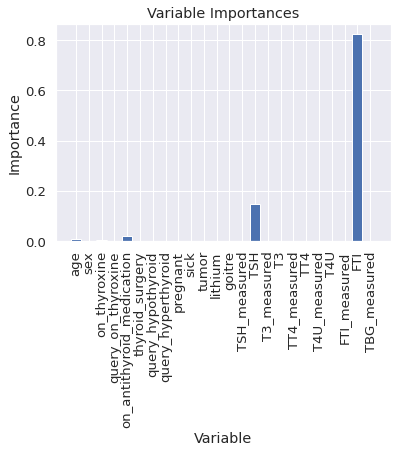

In [114]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> Therefore the most useful features to our prediction are FTI, TSH, on antithyroid medication and age.

> For the two features are FTI an TSH

#### Using the two features to see how they improve the perfomance

In [115]:
# Using most useful features for our prediction
y = hypothyroid_df['status'].values


test_features = ['FTI', 'TSH']

# selecting the two features.
X = hypothyroid_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 50, random_state=42, min_samples_split = 10, max_depth=3)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.955318
std,0.198619,0.193809
min,0.000000,0.014890
25%,1.000000,0.999409
50%,1.000000,0.999409
75%,1.000000,0.999409
max,1.000000,0.999409


In [116]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01751745346539768
Mean Squared Error: 0.012334732917193409
Root Mean Squared Error: 0.11106184275975889


> There is no much difference in the first model and second since, the mean squire error are still equal.

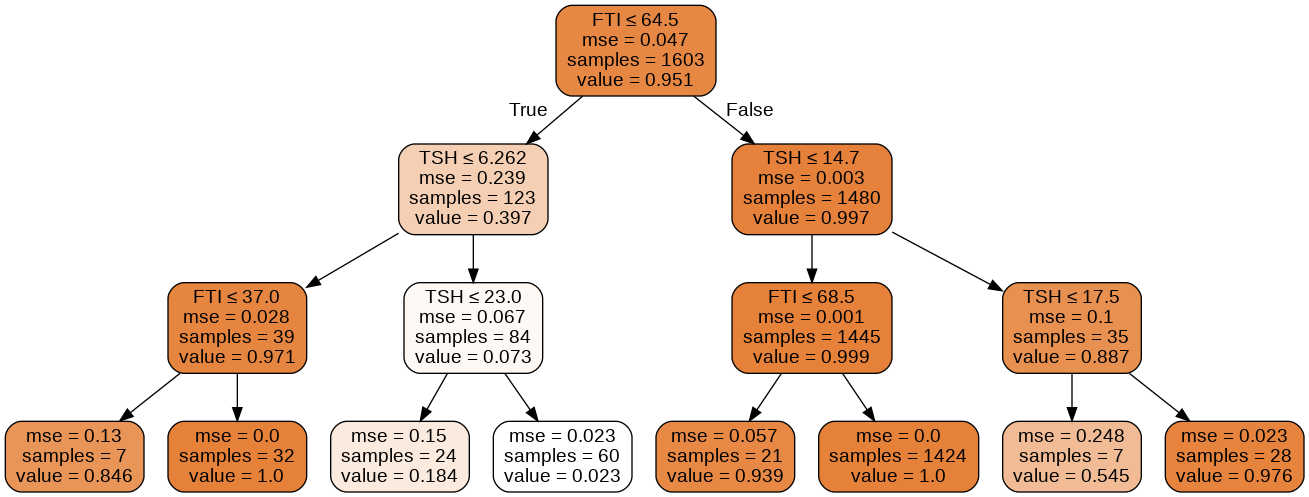

In [117]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_df.png')
Image(graph.create_png())

> 

> Using the most useful features does not change the the mse, tuning our hyperparameter by using lower maximum depth doesnt make so much changes.

## Boosting 

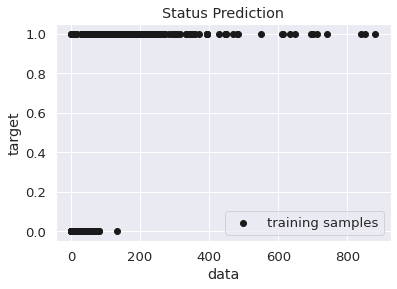

In [118]:
# Using the FTI since its the most contributing factor
y = hypothyroid_df['status'].values
# we use FTI as the independent variable
X = hypothyroid_df['FTI'].values.reshape(-1, 1)
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Status Prediction")
plt.legend()
plt.show()

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

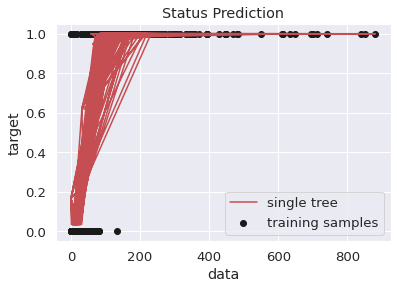

In [120]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Status Prediction")
plt.legend()
plt.show()

#### Using the adaboosting regressor for hyperparametor tuning

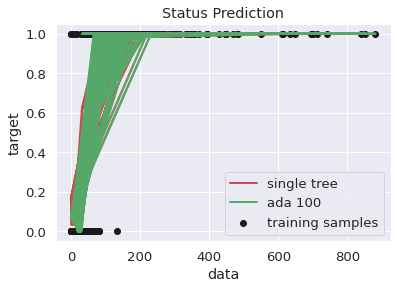

In [121]:
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 100", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Status Prediction")
plt.legend()
plt.show()


> Using the adaboosting improves our prediction by increasing the prediction

#### Gradient Boosting

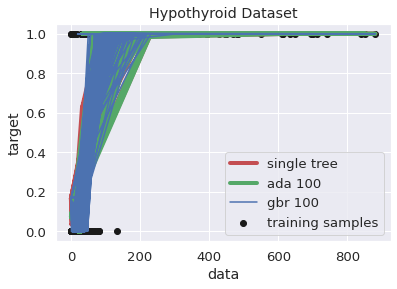

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 100

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.3, max_depth=4)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 100", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 100")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Hypothyroid Dataset")
plt.legend()
plt.show()

> Using the the gradient boosting, it improves our model by making the prediction precise. 

## Part 2: Support Vector Machine

In [123]:
# Removing the target column
hypothyroid = hypothyroid_df.drop('status', axis=1)
y = hypothyroid_df['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(hypothyroid)
X = pca.transform(hypothyroid)
X.shape


(3163, 2)

> For the SVM, we use the PCA to reduce the dimension of the dataframe to two features.

In [124]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Fitting the Polynomial Model

In [125]:
# Building the model 
polyclassifier = SVC(kernel='linear',gamma=4)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=4, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Visualizing the model

In [ ]:
# Create a mesh grid for our graph

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [126]:
# making prediction
y_pred = polyclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 

In [127]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9731437598736177
[[ 16  10]
 [  7 600]]


> For our linear model, has a 97% prediction rate. The prediction rate model is good so far.

#### Fitting the Sigmoid model

In [128]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid', gamma=5)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Visualizing the Sigmoid model

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypotyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Making prediction of the sigmoid model

In [129]:
# making prediction
y_pred = sigclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 

In [130]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9067930489731437
[[  0  26]
 [ 33 574]]


> For the sigmoid model, our prediction rate is 90% is good but not better compared to the linear kernel model

##### Fitting the rbf Model

In [131]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma=5)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Glass Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Making our prediction

In [132]:
# making prediction
y_pred = rbfclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [133]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9589257503949447
[[  1  25]
 [  1 606]]


> For the radial basis function, the prediction rate is 95%, if we compare with the other kernel model the linear kernel model is much more good for prediction compared with the all the other models.

# Challenging the solution

> We shall challenge our model by performing our model using the most factor contributing to hypothyroidic condition

In [134]:
# Using most useful features for our prediction
y = hypothyroid_df['status'].values


test_features = ['FTI']

# selecting the two features.
X = hypothyroid_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 50, random_state=42, min_samples_split = 10, max_depth=3)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.959195
std,0.198619,0.167330
min,0.000000,0.025291
25%,1.000000,0.999845
50%,1.000000,0.999845
75%,1.000000,0.999845
max,1.000000,0.999845


In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Glass Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Fitting Polynomial Kernel Model

In [139]:
# Building the model 
polyclassifier = SVC(kernel='linear',gamma=10)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Create a mesh grid for our graph

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Making our prediction

In [140]:
# making prediction
y_pred = polyclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 

In [141]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9715639810426541
[[ 13  13]
 [  5 602]]


#### Fitting the Sigmoid Kernel Model

In [142]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid', gamma=10)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Visualizing the Sigmoid Model

In [ ]:
# Create a mesh grid for our graph

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Making prediction of the sigmoid model

In [143]:
# making prediction
y_pred = sigclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [144]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9605055292259084
[[  2  24]
 [  1 606]]


## Fitting the rbf Model

In [145]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma=10)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Visualizing the rbf model

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Glass Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### Making our prediction

In [146]:
# making prediction
y_pred = rbfclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [147]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9715639810426541
[[ 14  12]
 [  6 601]]


> When we use the most relevant feature, we find our prediction rates kernel as polynomial 97%, sigmoid 96% and rbf as 97%. Therefore we find polynomial and rbf to be better in the prediction rate.

## Conclusion

> The polynomial kernel model seems to perform better compared to the other models especially when we perfom the pca.

> When we select the most important feature and increasing our gamma, the prediction rate for rbf and sigmoid improve significantly by around 5%. It show there is higher presition in the prediction.

## Recomendation

> Therefore its relevant to reduce our independent variables and focus on the most relevant ones.

> We need to increase our gamma by tuning our model for better precision.

## Follow up Questions

### a). Did we have the right data?

> Yes, but its ideal to focus on the most relevant independent variables to make our prediction most effective.

### b). Do we need other data to answer our question?

> We have enough dataset for the analysis

### c). Did we have the right question?

> Yes, but challenging to answer the questions